# K-nearest neighbors

In [1]:
import numpy as np
import imageio as imio
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
!pip install numpy==1.16.2
import numpy as np
print(np.__version__)

In [2]:
if tf.__version__.startswith("2."):
  import tensorflow.compat.v1 as tf
  tf.compat.v1.disable_v2_behavior()
  tf.compat.v1.disable_eager_execution()
  print("Enabled compatitility to tf1.x")

Instructions for updating:
non-resource variables are not supported in the long term
Enabled compatitility to tf1.x


In [3]:
images_inception_features = 'training_inception_features_array.npy'
training_image_labels_array = 'training_image_labels_array.npy'
training_image_names_array = 'training_image_names_array.npy'

In [4]:
TRAIN_DICTIONARY_KEYS = ["images", "label","features"]

training_set_dict = dict()
    
training_set_dict['images_name'] = np.load(training_image_names_array)
training_set_dict['label'] = np.load(training_image_labels_array)
training_set_dict['features'] = np.load(images_inception_features)


In [5]:
training_set_dict.get("label")

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [6]:
features = training_set_dict['features']
labels = training_set_dict['label']
images_name = training_set_dict['images_name']

In [32]:
len(labels)

10222

In [ ]:
print('Label: ',labels[4])

print('Nombre: ',images_name[4])

img = imio.imread('./train/'+images_name[4]+'.jpg')
plt.imshow(img)


La data la vamos a manejar en los siguientes 3 arreglos: 

- features    : features de la imagen dadas por google Inception
- labels      : label de la imagen, identifica que raza es
- images_name : nombre de la imgen original, si descargan el dataset con link en la descripcion pueden buscar la imagen original por este nombre.

## Distance Metric: Euclidean

<img width=500 height=300 src="https://i.stack.imgur.com/7PJAr.png" />

## KKN Algorithm

In [74]:
class kkn():

  def __init__(self, features, labels):
    self.features = features
    self.labels = labels

  ## L2 - Euclidean dist.  
  def euclidean_distance(self, x_train, x_test):
      return tf.norm(x_train-x_test, ord='euclidean', axis=1)
  
  def predict(self, y_train, x_train, x_test, k):  
    _, top_k_indices = tf.nn.top_k(tf.negative(self.euclidean_distance(x_train, x_test)), k = k)         
    nearest_neighbors = tf.gather(y_train, top_k_indices)   
    y, idx, count = tf.unique_with_counts(nearest_neighbors)
    pred = y[tf.argmax(count)]
    return pred


In [71]:
def classifier(test_features, features, labels, k):

    kkn_classifier = kkn(features, labels)

    g = tf.Graph()
        
    with g.as_default():
        
        X_test = tf.placeholder(shape=[len(kkn_classifier.features[0])], dtype=tf.float32, name ="x_test")
        X_train = tf.placeholder(shape=[None, len(kkn_classifier.features[0])], dtype=tf.float32, name ="x_train")
        Y_train = tf.placeholder(shape=[len(kkn_classifier.labels)], dtype=tf.string, name="y_train")
        
        prediction = kkn_classifier.predict(Y_train, X_train, X_test, k)

        writer = tf.summary.FileWriter("exp/", g)
        
        with tf.train.MonitoredSession() as session:
    
            feed_dict = {X_test: test_features, X_train: kkn_classifier.features, Y_train: kkn_classifier.labels}          
            result = session.run(prediction, feed_dict = feed_dict)
            return result

## K value 

$k = \sqrt{n}$


In [64]:
k = len(features)**(1/2)
k

101.10390694725896

## Prediction

In [80]:
img_pred = features[300]
breed_pred = classifier(img_pred, features, labels, 101)
print("Breed prediction: " + str(breed_pred))

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Breed prediction: b'bedlington_terrier'


## Real Value

Read Breed:  bedlington_terrier


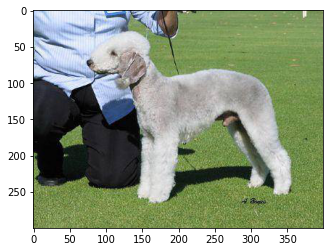

In [87]:
image(300, 'train')

In [86]:
def image(index, path):
  print('Read Breed: ',labels[index])
  img = imio.imread('/content/drive/MyDrive/Msc/T2/kkn/'+path+'/'+images_name[index]+'.jpg')
  plt.imshow(img)

## Test

In [42]:
test_features = np.load('test_inception_features_array.npy')

### Test #1

In [90]:
img_pred = test_features[0]
breed_pred = classifier(img_pred, features, labels, 101)
print("Breed prediction: " + str(breed_pred))

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Breed prediction: b'german_shepherd'


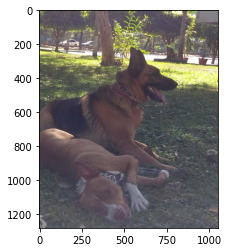

In [88]:
img_test = imio.imread('/content/drive/MyDrive/Msc/T2/kkn/test/test1.jpg')
plt.imshow(img_test)

### Test #2

In [91]:
img_pred = test_features[1]
breed_pred = classifier(img_pred, features, labels, 101)
print("Breed prediction: " + str(breed_pred))

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Breed prediction: b'american_staffordshire_terrier'


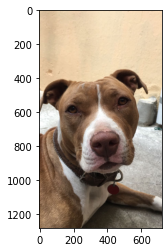

In [92]:
img_test = imio.imread('/content/drive/MyDrive/Msc/T2/kkn/test/test2.jpg')
plt.imshow(img_test)